**step 1:- Import Library**

In [ ]:
!pip install  -q tensorflow
!pip install  -q  gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.8 MB/s 

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import utils  # to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir( "/content/drive/MyDrive/ Deep Learning Projects/ cat-dog classification")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!dir

cat_dog\ _image\ classification\ using\ CNN.ipynb  test.rar
cat\ or\ dog\ classification.ipynb		   train.rar


In [ ]:
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 3.4 MB/s eta 0:00:00


In [ ]:
import patoolib
patoolib.extract_archive("train.rar")
patoolib.extract_archive("test.rar")

INFO patool: Extracting train.rar ...
INFO:patool:Extracting train.rar ...
INFO patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/ Deep Learning Projects/ cat-dog classification/train.rar"
INFO:patool:running /usr/bin/unrar x -- "/content/drive/MyDrive/ Deep Learning Projects/ cat-dog classification/train.rar"
INFO patool:     with cwd='./Unpack_zmkrtjhv', input=''
INFO:patool:    with cwd='./Unpack_zmkrtjhv', input=''
INFO patool: ... train.rar extracted to `train'.
INFO:patool:... train.rar extracted to `train'.
INFO patool: Extracting test.rar ...
INFO:patool:Extracting test.rar ...
INFO patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/ Deep Learning Projects/ cat-dog classification/test.rar"
INFO:patool:running /usr/bin/unrar x -- "/content/drive/MyDrive/ Deep Learning Projects/ cat-dog classification/test.rar"
INFO patool:     with cwd='./Unpack_7c0je722', input=''
INFO:patool:    with cwd='./Unpack_7c0je722', input=''
INFO patool: ... test.rar extracted to `t

'test'

**Step2:- Define Constants**

In [ ]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

**step3:-Prepare Traning Data**

In [ ]:
filenames = os.listdir("train")
categories = []

for filename in filenames:
    category = filename.split('.')[0]  # Corrected the variable name
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})




In [ ]:
# Display the first few rows
df.head()


,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.101.jpg,0


In [ ]:
df.tail()

,filename,category
397,dog.95.jpg,1
398,dog.96.jpg,1
399,dog.97.jpg,1
400,dog.98.jpg,1
401,dog.99.jpg,1


**See Total In count**

<Axes: xlabel='category'>

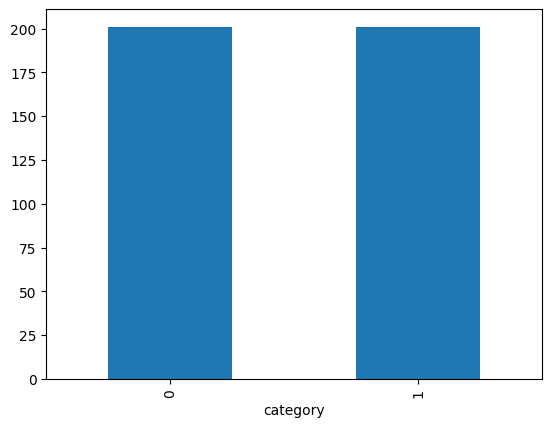

In [ ]:
df['category'].value_counts().plot.bar()

**See sample image**

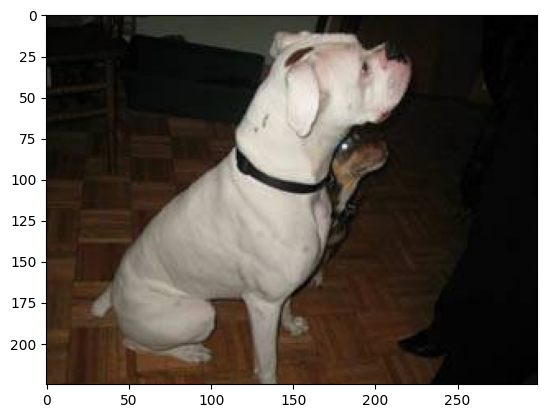

In [ ]:
sample = random.choice(filenames)
image = load_img("train/"+sample)
plt.imshow(image)

Input Layer: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.

Conv Layer: This layer will extract features from image.

Pooling Layer: This layerreduce the spatial volume of input image after convolution.

Fully Connected Layer: It connect the network from a layer to another layer
Output Layer: It is the predicted values layer.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model= Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes


model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

**Callbacks**

**Early Stop**

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased


**Learning Rate Reduction**

We will reduce the learning rate when then accuracy not increase for 2 steps

In [ ]:
earlystop = EarlyStopping(patience=10)

learning_rate_reduction =  ReduceLROnPlateau(monitor='val_accuracy',
                                          patience=2,
                                          verbose=1,
                                          factor=0.5,
                                          min_lr=0.000001)

callbacks= [earlystop,learning_rate_reduction]





**Prepare data**

Because we will use image genaretor with class_mode="categorical". We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification.

So we will convert 1 to dog and 0 to cat

In [ ]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets (80% train, 20% validation)
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42, stratify=df['category'])

# Reset the index for both dataframes
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)


<Axes: xlabel='category'>

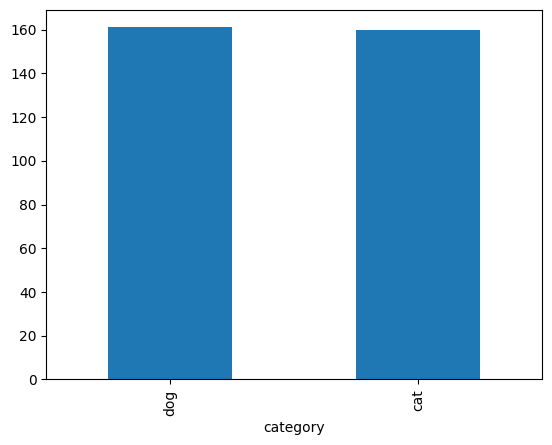

In [ ]:
train_df['category'].value_counts().plot.bar()

<Axes: xlabel='category'>

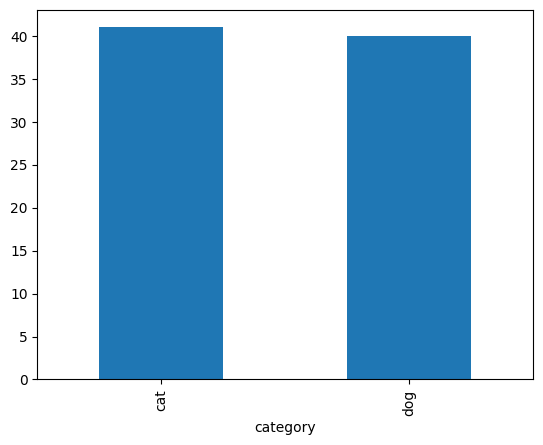

In [ ]:
validate_df['category'].value_counts().plot.bar()

In [ ]:
validate_df.shape

(81, 2)

In [ ]:
total_train=train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size= 32

**Traning Generator**

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Adjust brightness
    rescale=1./255  # Normalize pixel values
)


train_generator= train_datagen.flow_from_dataframe(
    train_df,
    "train/",
    x_col= "filename",
    y_col="category",
    target_size=IMAGE_SIZE,
    class_mode="categorical",
    batch_size=batch_size


)

Found 321 validated image filenames belonging to 2 classes.


**Validation Generator**

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 81 validated image filenames belonging to 2 classes.


**See how our generator work**

In [ ]:
example_df=train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


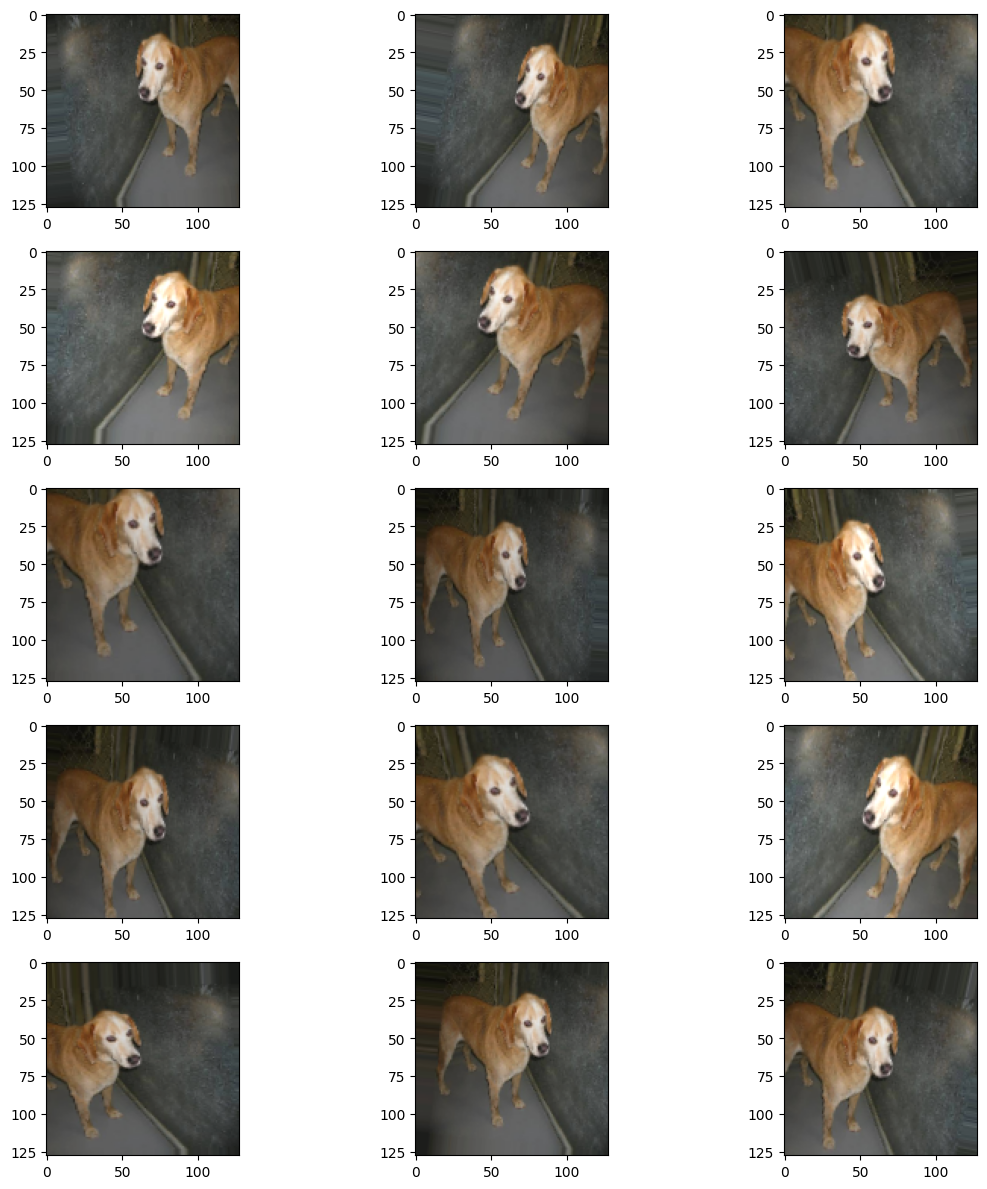

In [ ]:
plt.figure(figsize=(12,12))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for X_batch,Y_batch in example_generator:
       image = X_batch[0]
       plt.imshow(image)
       break
plt.tight_layout()
plt.show()



**Fit Model**

In [ ]:
epochs = 50  # Increase the number of epochs if needed

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate // batch_size,
    steps_per_epoch=total_train // batch_size,
    callbacks=callbacks
)

# Save the trained model
model.save("my_model.keras")




Epoch 1/50
10/10 [==============================] - 11s 351ms/step - loss: 1.9965 - accuracy: 0.5031 - val_loss: 1.1077 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/50
10/10 [==============================] - 3s 342ms/step - loss: 1.1838 - accuracy: 0.5986 - val_loss: 4.0222 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 3/50
10/10 [==============================] - 4s 468ms/step - loss: 1.2180 - accuracy: 0.5882 - val_loss: 2.6655 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 4/50
10/10 [==============================] - 3s 297ms/step - loss: 0.9198 - accuracy: 0.6125 - val_loss: 5.1292 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/50
10/10 [==============================] - ETA: 0s - loss: 0.9694 - accuracy: 0.6228
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
10/10 [==============================] - 3s 302ms/step - loss: 0.9694 - accuracy: 0.6228 - val_loss: 2.1351 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 6/50
10/10 [==============================] - 6s 582ms/step

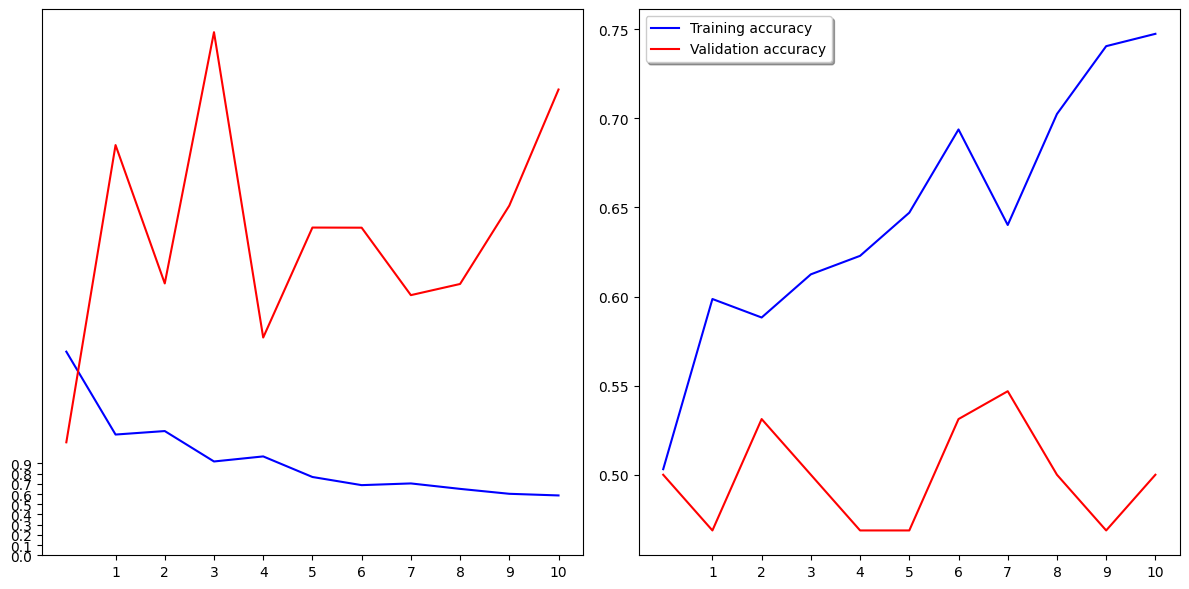

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 11, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 11, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

Confusion matrix and Classificaton Report

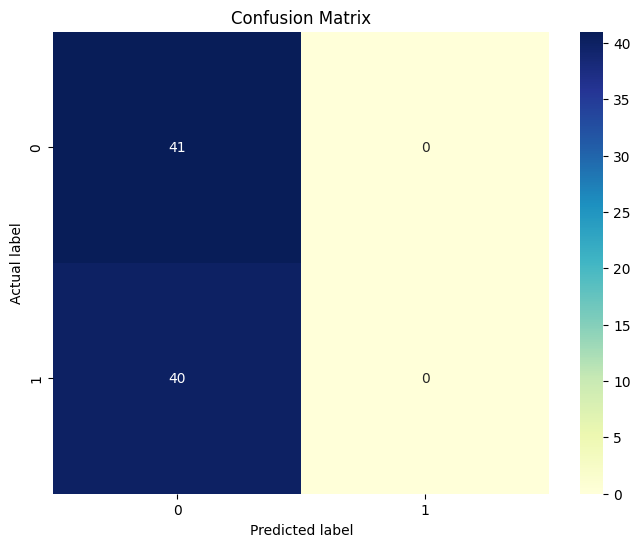

In [ ]:
# Assuming you have defined y_test and y_pred earlier or from your model predictions

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()



In [ ]:
# Calculate and print the Classification Report with zero_division parameter
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67        41
           1       1.00      0.00      0.00        40

    accuracy                           0.51        81
   macro avg       0.75      0.50      0.34        81
weighted avg       0.75      0.51      0.34        81



In [ ]:
# prediction
result = model.predict(validation_generator,batch_size = batch_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_test = validation_generator.labels

# Evaluvate
loss,acc = model.evaluate(validation_generator, batch_size = batch_size, verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 50.61728358268738
The Loss of the model for testing data is: 4.50474739074707


In [ ]:

import os
import cv2
import random
from google.colab.patches import cv2_imshow

for i in range(10):
    all_test_images = os.listdir('test')
    random_image = random.choice(all_test_images)
    img = cv2.imread(f'test/{random_image}')
    img = cv2.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))

    org = img.copy()
    img = img.reshape(1, 128, 128, 3)

    pred = model.predict(img)
    print(['cat', 'dog'][int(pred[0][0])])

    org = cv2.resize(org, None, fx=3, fy=3)
    cv2_imshow(org)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!pip install gradio==3.50

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.9 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5584 sha256=20ece144e18058362aa99b9a74e19a4bca971b106a82588f43d84e1f10b41e

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import gradio as gr

In [ ]:
from keras.models import load_model

# Specify the full path to the model file
model_path = "/content/drive/MyDrive/ Deep Learning Projects/ cat-dog classification/my_model.keras"
# Load the model using the full path
model = load_model(model_path)

In [ ]:
def predict(image):
    img = cv2.resize(image,(128,128))
    img = img.reshape(1,128,128,3)
    preds = model.predict(img)[0]
    result = dict()
    result["Cat"] = round(float(list(preds)[0]), 3)
    result["Dog"] = round(float(list(preds)[1]), 3)

    return result

In [ ]:
im = gr.Image()
label = gr.Label(num_top_classes=2)

gr.Interface(fn=predict,
             inputs=im,
             outputs=label,
             title="CNN Demo").launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://ce491e5de87c692b81.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 112ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://ce491e5de87c692b81.gradio.live


**Conclusion:-The provided metrics suggest that while the model achieves a satisfactory training accuracy of 74.74%, it struggles with generalization, evident from the poor validation accuracy of 50.00%**